# Processing the Data Collection Runs

In [1]:
import wandb
import os

In [2]:
ENTITY = 'jnzhao3'
PROJECT_NAME = 'aorl'

In [31]:
api = wandb.Api()
# runs = api.runs(f'{ENTITY}/{PROJECT_NAME}', filters={'display_name': 'simulation_3_0.0, 20.0_20.0, 0.0_10.0, 6.0'})[0]
runs = api.runs(f'{ENTITY}/{PROJECT_NAME}', filters={'config.task_end': [20, 0], 'config.task_start': [0, 20], 'config.collection_steps': 1000000})

In [4]:
print(len(list(runs)))
run = runs[0]

11


In [5]:
run.config['additional_feature'] = 7

In [6]:
del run.config['additional_feature']

In [7]:
run.config

{'task_end': [20, 0],
 'waypoint': [15, 0],
 'task_start': [0, 20],
 'train_steps': 1000000,
 'action_noise': 0,
 'eval_interval': 100000,
 'collection_steps': 1000000}

In [32]:
for r in runs[:5]:
    # print(r.config)
    # print(r.metadata['startedAt'][11:], r.state)
    r.config['job'] = 3148143
    r.config['experiment'] = 'simulation_3_3'
    # r.config.update({'job': 3148143, 'experiment': 'simulation_3_3'}, allow_val_change=True)
    r.update()
    # print(r.state)

In [33]:
runs_testing = api.runs(f'{ENTITY}/{PROJECT_NAME}', filters={'config.job': 3148143})
len(runs_testing)

5

In [34]:
runs[5].config['job'] = 31482081
runs[5].config['experiment'] = 'simulation_3_3'
runs[5].update()

# runs[5].config.update({'job': 31482081, 'experiment': 'simulation_3_3'}, allow_val_change=True)

In [35]:
for r in runs[6:11]:
    r.config['job'] = 31482114
    r.config['experiment'] = 'simulation_3_3'
    # r.config.update({'job': 31482114, 'experiment': 'simulation_3_3'}, allow_val_change=True)
    r.update()

for r in runs:
    r.update()
    print(r.config)
    print(r.state)

{'task_end': [20, 0], 'waypoint': [15, 0], 'task_start': [0, 20], 'train_steps': 1000000, 'action_noise': 0, 'eval_interval': 100000, 'collection_steps': 1000000, 'job': 3148143, 'experiment': 'simulation_3_3'}
failed
{'task_end': [20, 0], 'waypoint': [4, 9], 'task_start': [0, 20], 'train_steps': 1000000, 'action_noise': 0, 'eval_interval': 100000, 'collection_steps': 1000000, 'job': 3148143, 'experiment': 'simulation_3_3'}
crashed
{'task_end': [20, 0], 'waypoint': [0, 20], 'task_start': [0, 20], 'train_steps': 1000000, 'action_noise': 0, 'eval_interval': 100000, 'collection_steps': 1000000, 'job': 3148143, 'experiment': 'simulation_3_3'}
crashed
{'task_end': [20, 0], 'waypoint': [4, 6], 'task_start': [0, 20], 'train_steps': 1000000, 'action_noise': 0, 'eval_interval': 100000, 'collection_steps': 1000000, 'job': 3148143, 'experiment': 'simulation_3_3'}
failed
{'task_end': [20, 0], 'waypoint': [10, 6], 'task_start': [0, 20], 'train_steps': 1000000, 'action_noise': 0, 'eval_interval': 10

In [36]:
runs = api.runs(f'{ENTITY}/{PROJECT_NAME}', filters={'config.job': 31482114})

In [37]:
len(runs)

5

Success! All the runs have been properly tagged.

## Analyzing the Correct Runs

In [44]:
runs[0].name

'simulation_3_0.0, 20.0_20.0, 0.0_4.0, 6.0'

In [45]:
import pickle

In [46]:
with open('all_trajs-950000.pkl', 'rb') as f:
    trajs = pickle.load(f)

In [ ]:
trajs['evaluation/(0.0, 20.0) to (20.0, 0.0)'][0].keys()

dict_keys(['observation', 'next_observation', 'action', 'reward', 'done', 'info'])

trajs, there's a list five
each list item is a dictionary with keys, observations

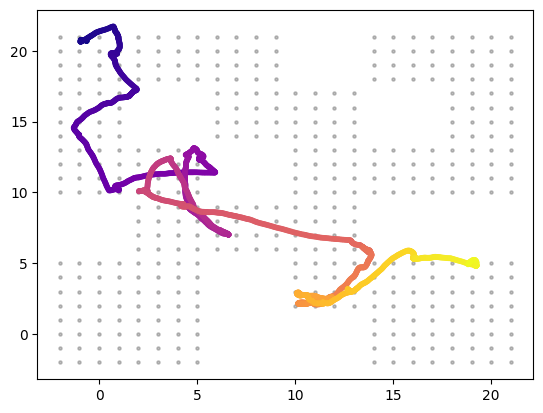

In [80]:
import matplotlib.pyplot as plt
import numpy as np

points = np.array(trajs['evaluation/(0.0, 20.0) to (20.0, 0.0)'][4]['observation'])[:, :2]
with open('cells.pkl', 'rb') as f:
    all_cells = pickle.load(f)
    all_cells = np.array(all_cells)

plt.scatter(all_cells[:, 0], all_cells[:, 1], s=5, c='gray', alpha=0.5)
plt.scatter(points[:, 0], points[:, 1], s=10, c=range(len(points)), cmap='plasma')
plt.show()

In [78]:
# load from npz
dataset = np.load('data-1000000.npz')

In [79]:
data_obs = dataset['observations']

In [82]:
len(data_obs)

1999500

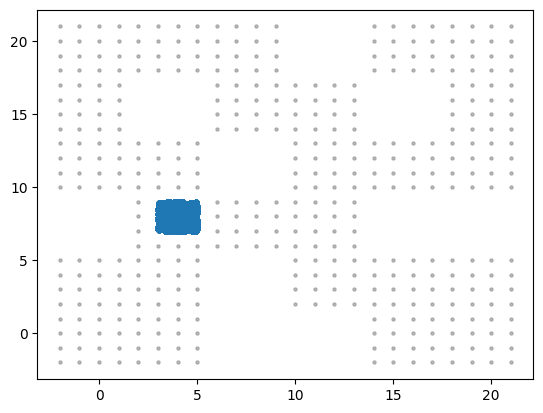

In [85]:
plt.scatter(all_cells[:, 0], all_cells[:, 1], s=5, c='gray', alpha=0.5)
plt.scatter(data_obs[-1000000:, 0], data_obs[-1000000:, 1], s=10)
plt.show()